Author: Muhammad Zaki Fuadi

Home Credit Data Preparation

**Project Background**: 

Banyak orang mengalami kesulitan mendapatkan pinjaman karena riwayat kredit yang tidak mencukupi atau bahkan tidak ada sama sekali. Home Credit berupaya untuk memperluas inklusi keuangan bagi mereka yang tidak memiliki akses perbankan dengan menyediakan pengalaman peminjaman yang positif dan aman. Untuk memastikan bahwa populasi yang kurang dilayani ini memiliki pengalaman pinjaman yang positif, Home Credit memanfaatkan berbagai data alternatif untuk memprediksi kemampuan pembayaran klien mereka. Dengan melakukannya, diharapkan klien yang mampu untuk membayar tidak ditolak dan pinjaman diberikan dengan prinsipal, jangka waktu, dan jadwal pembayaran yang akan memberdayakan klien untuk meraih kesuksesan.

**Objective**:

1. Mengidentifikasi karakteristik dari calon klien yang mungkin mengalami kesulitan dalam melunasi pinjaman.
2. Memprediksi kemampuan pembayaran klien.

**Actions**:

1. Melakukan pembersihan data dan visualisasi untuk mendapatkan wawasan bisnis.
2. Membangun model dengan algoritma machine learning.
3. Memprediksi kemampuan pembayaran klien pada data aplikasi uji dengan menggunakan model machine learning terbaik.
4. Memberikan rekomendasi kepada perusahaan untuk meningkatkan keberhasilan klien dalam mengajukan pinjaman.

### Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Ingest Data

In [80]:
application_train = pd.read_csv("application_train.csv", sep=";", on_bad_lines='skip')
application_test = pd.read_csv("application_test.csv")
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
previous_application = pd.read_csv("previous_application.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")

C:\Users\ACER\AppData\Local\Temp\ipykernel_24544\1731785350.py:1: DtypeWarning: Columns (7,19,42) have mixed types. Specify dtype option on import or set low_memory=False.
  application_train = pd.read_csv("application_train.csv", sep=";", on_bad_lines='skip')


In [81]:
application_train['SK_ID_CURR'] = application_train['SK_ID_CURR'].astype(str)
application_train['AMT_INCOME_TOTAL'] = application_train['AMT_INCOME_TOTAL'].str.replace('.', '').astype(float)
application_train['DAYS_REGISTRATION'] = application_train['DAYS_REGISTRATION'].str.replace('.', '').astype(float)
application_train['EXT_SOURCE_2'] = application_train['EXT_SOURCE_2'].str.replace(',', '.').astype(float)
bureau['SK_ID_CURR'] = bureau['SK_ID_CURR'].astype(str)
bureau['SK_ID_BUREAU'] = bureau['SK_ID_BUREAU'].astype(str)
bureau_balance['SK_ID_BUREAU'] = bureau_balance['SK_ID_BUREAU'].astype(str)
previous_application['SK_ID_PREV'] = previous_application['SK_ID_PREV'].astype(str)
previous_application['SK_ID_CURR'] = previous_application['SK_ID_CURR'].astype(str)
credit_card_balance['SK_ID_PREV'] = credit_card_balance['SK_ID_PREV'].astype(str)
credit_card_balance['SK_ID_CURR'] = credit_card_balance['SK_ID_CURR'].astype(str)
installments_payments['SK_ID_PREV'] = installments_payments['SK_ID_PREV'].astype(str)
installments_payments['SK_ID_CURR'] = installments_payments['SK_ID_CURR'].astype(str)
POS_CASH_balance['SK_ID_PREV'] = POS_CASH_balance['SK_ID_PREV'].astype(str)
POS_CASH_balance['SK_ID_CURR'] = POS_CASH_balance['SK_ID_CURR'].astype(str)

C:\Users\ACER\AppData\Local\Temp\ipykernel_24544\1667096930.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  application_train['AMT_INCOME_TOTAL'] = application_train['AMT_INCOME_TOTAL'].str.replace('.', '').astype(float)
C:\Users\ACER\AppData\Local\Temp\ipykernel_24544\1667096930.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  application_train['DAYS_REGISTRATION'] = application_train['DAYS_REGISTRATION'].str.replace('.', '').astype(float)


In [82]:
df_train = application_train.copy()
# bereau = bureau.merge(bureau_balance, how = "inner", on='SK_ID_BUREAU')
# df_train = application_train.merge(bereau, how = "left", on='SK_ID_CURR')
# previous_application = previous_application.merge(credit_card_balance, how = "left", on='SK_ID_PREV')
# previous_application = previous_application.merge(installments_payments, how = "left", on='SK_ID_PREV')
# previous_application = previous_application.merge(POS_CASH_balance, how = "left", on='SK_ID_PREV')
# df_train = df_train.merge(previous_application, how = "inner", on='SK_ID_CURR')


In [83]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    object 
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [84]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,2025000.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,NaN,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,2700000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,NaN,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,675000.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,NaN,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [85]:
def drop_columns_containing_y(df):
    # Mengambil list kolom yang mengandung "_y"
    kolom_y = [kolom for kolom in df.columns if '_y' in kolom]

    # Menghapus kolom yang mengandung "_y"
    df.drop(columns=kolom_y, inplace=True)

    return df

def rename_columns_without_x(df):
    # Mengambil list nama kolom
    kolom_baru = [kolom[:-2] if kolom.endswith('_x') else kolom for kolom in df.columns]

    # Mengganti nama kolom
    df.columns = kolom_baru

    return df

df_train = drop_columns_containing_y(df_train)
df_train = rename_columns_without_x(df_train)
print('This dataset has %d rows dan %d columns.\n' % df_train.shape)

This dataset has 307511 rows dan 122 columns.



##### Cek Missing Value

In [86]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [87]:
missing_data(df_train).head()

,Total,Percent
DAYS_REGISTRATION,299319,97.336030
AMT_INCOME_TOTAL,241975,78.688242
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MEDI,214865,69.872297


##### Cek Duplicate Data

In [88]:
print('The number of duplication is:', df_train.duplicated().sum())
# there is no duplication

The number of duplication is: 0


Handling Missing Value

In [89]:
# drop features that have large number of missing values (± 50%)
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [90]:
# after drop some features
print('Missing values status:', df_train.isnull().values.any())
missing_data_train = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
missing_data_train['Percentage'] = (missing_data_train['Total Null Values']/df_train.shape[0])*100
missing_data_train = missing_data_train.sort_values(by=['Percentage'], ascending=False).reset_index()
missing_data_train.head()

Missing values status: True


,index,Total Null Values,Percentage
0,DAYS_REGISTRATION,299319,97.336030
1,AMT_INCOME_TOTAL,241975,78.688242
2,OCCUPATION_TYPE,96391,31.345545
3,EXT_SOURCE_2,78643,25.574045
4,EXT_SOURCE_3,60965,19.825307


In [91]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in category_columns):
            df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column]=df_train[column].fillna(df_train[column].median())

In [92]:
# after drop some features
print('Missing values status:', df_train.isnull().values.any())
missing_data_train = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
missing_data_train['Percentage'] = (missing_data_train['Total Null Values']/df_train.shape[0])*100
missing_data_train = missing_data_train.sort_values(by=['Percentage'], ascending=False).reset_index()
missing_data_train.head()

Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_REGION_NOT_WORK_REGION,0,0.0
2,REGION_POPULATION_RELATIVE,0,0.0
3,AMT_INCOME_TOTAL,0,0.0
4,TARGET,0,0.0


#### Cek Outlier Data

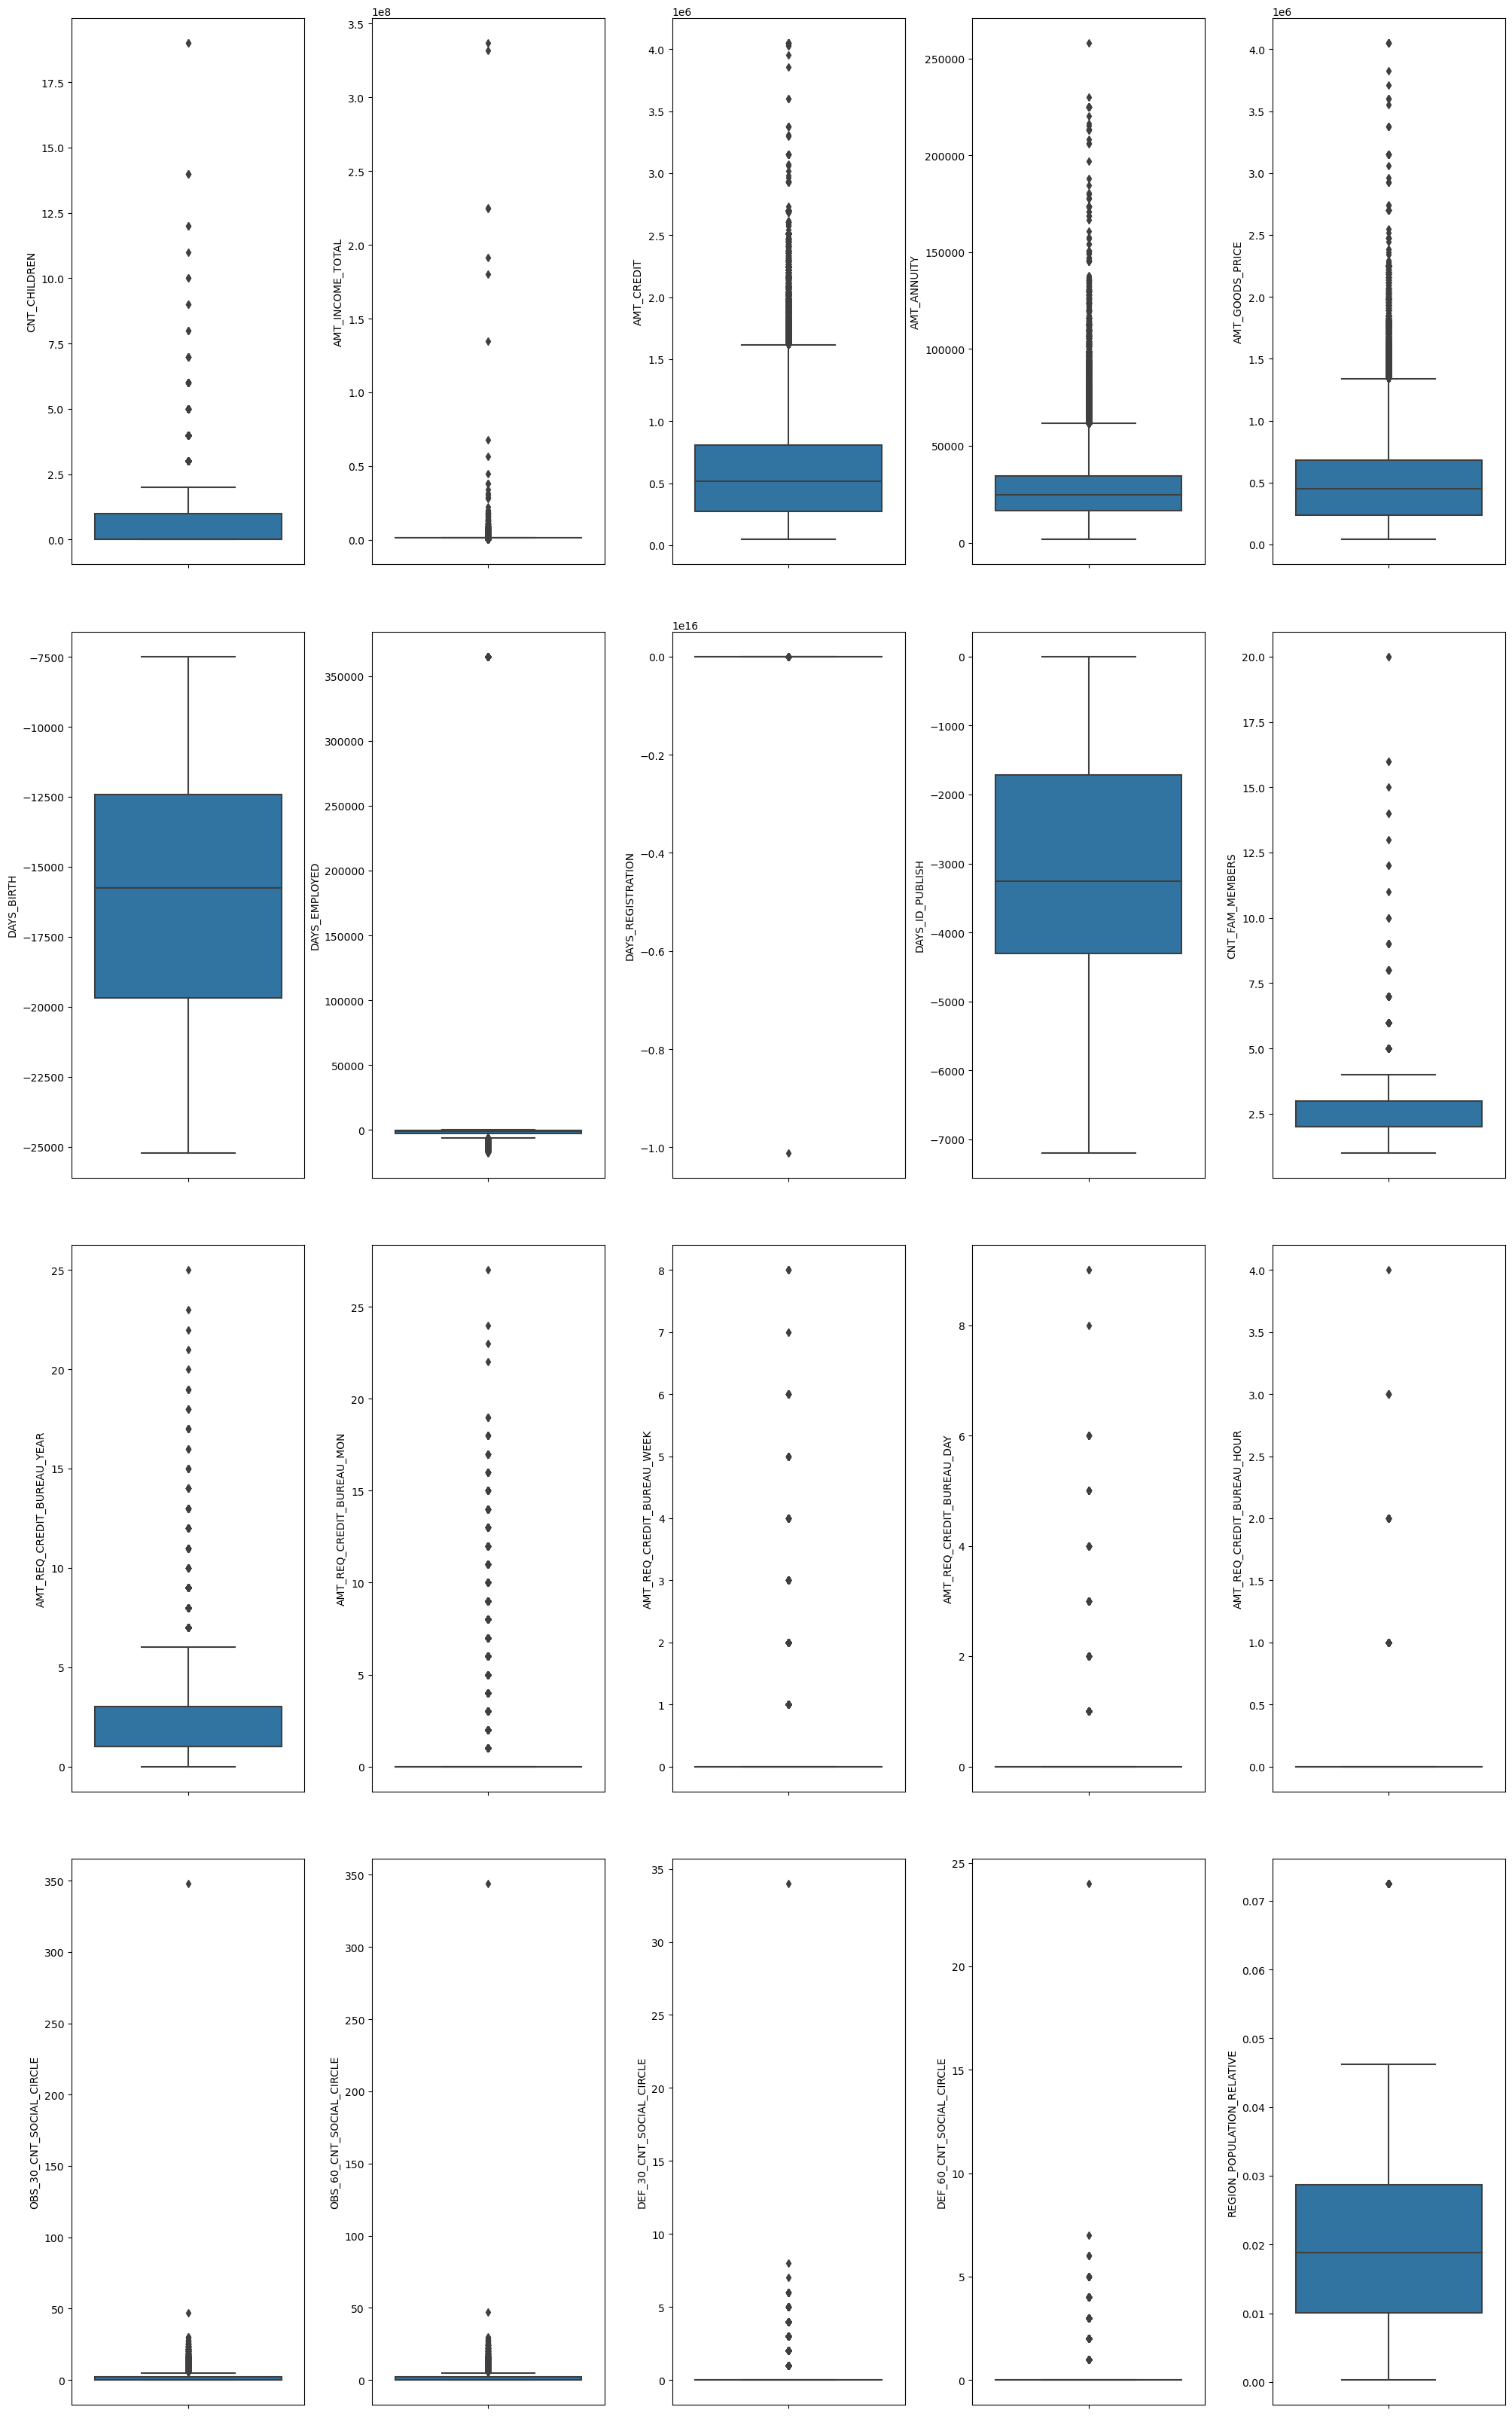

In [93]:
# List of numerical columns
numerical_columns = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
                     "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS",
                     "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK",
                     "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR",
                     "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", 
                     "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]

# Selecting only numerical features
int_features = df_train[numerical_columns]

# Calculating number of rows and columns for subplots
num_rows = (len(numerical_columns) - 1) // 5 + 1
num_cols = 5

# Creating subplots for all numerical columns
fig, axs = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20, 8*num_rows))
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=column, data=int_features, ax=axs[i // num_cols, i % num_cols])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Outlier pada fitur-fitur numerik yang disebutkan sebelumnya tidak akan dihapus karena mungkin terdapat wawasan yang bisa diambil dari outlier-outlier tersebut.

In [94]:
# Misalkan DataFrame Anda bernama 'df_cleaned' dan Anda ingin menyimpannya dalam folder 'data_cleaned'
path_to_folder = 'output_data/'  # Ganti dengan path lengkap ke folder Anda

# Menyimpan DataFrame ke dalam file CSV di dalam folder 'data_cleaned'
df_train.to_csv(path_to_folder + 'data_train.csv', index=False)


In [95]:
pwd

'D:\\PROJEK\\HomeCreditIndo\\home-credit-default-risk'